# **Выполнил: Троицкий Тимофей**
# **Группа: ПМ-32**

In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from skimage.io import imread
from skimage import io, transform


# Часть 1

## Номер 1

#### $\nu_1 = 32, \nu_2 = 69$  
#### $x(t) = \sin(2\pi\nu_1t) + \sin(2\pi\nu_2t)$  
#### Частоту дискретизации будем определять исходя из правила:$$f_д > 2F_{max} $$  
#### $F_{max} = max(\nu_1,\nu_2) = \nu_2$
#### $$f_д > 2\nu_2 $$
#### $$f_д > 138 Гц$$

## Номер 2

### Дискретизация сигнала с частотой f:  
#### $f_0 = 138$ Гц  
#### ***$f_1 = (f_0 - 10) = 128 Гц$:*** $$ \sin(64\pi\frac{n}{128}) + \sin(138\pi\frac{n}{128})$$  
#### ***$f_2 = (f_0 + 10) = 148 Гц$:*** $$ \sin(64\pi\frac{n}{148}) + \sin(138\pi\frac{n}{148}) $$  
#### ***$f_3 = (f_0 + 1) = 139 Гц$:*** $$ \sin(64\pi\frac{n}{139}) + \sin(138\pi\frac{n}{139}) $$


## Номер 3

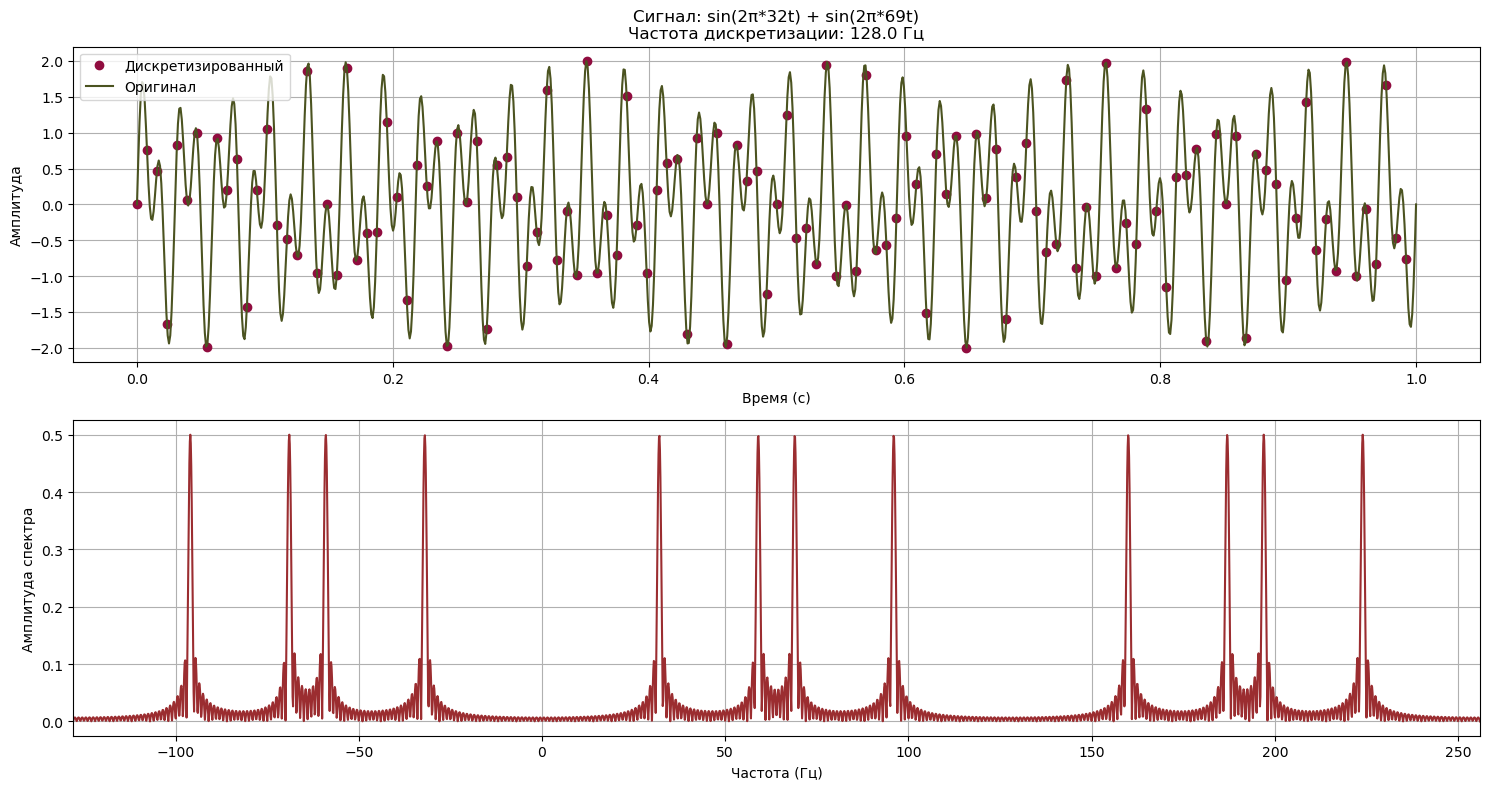

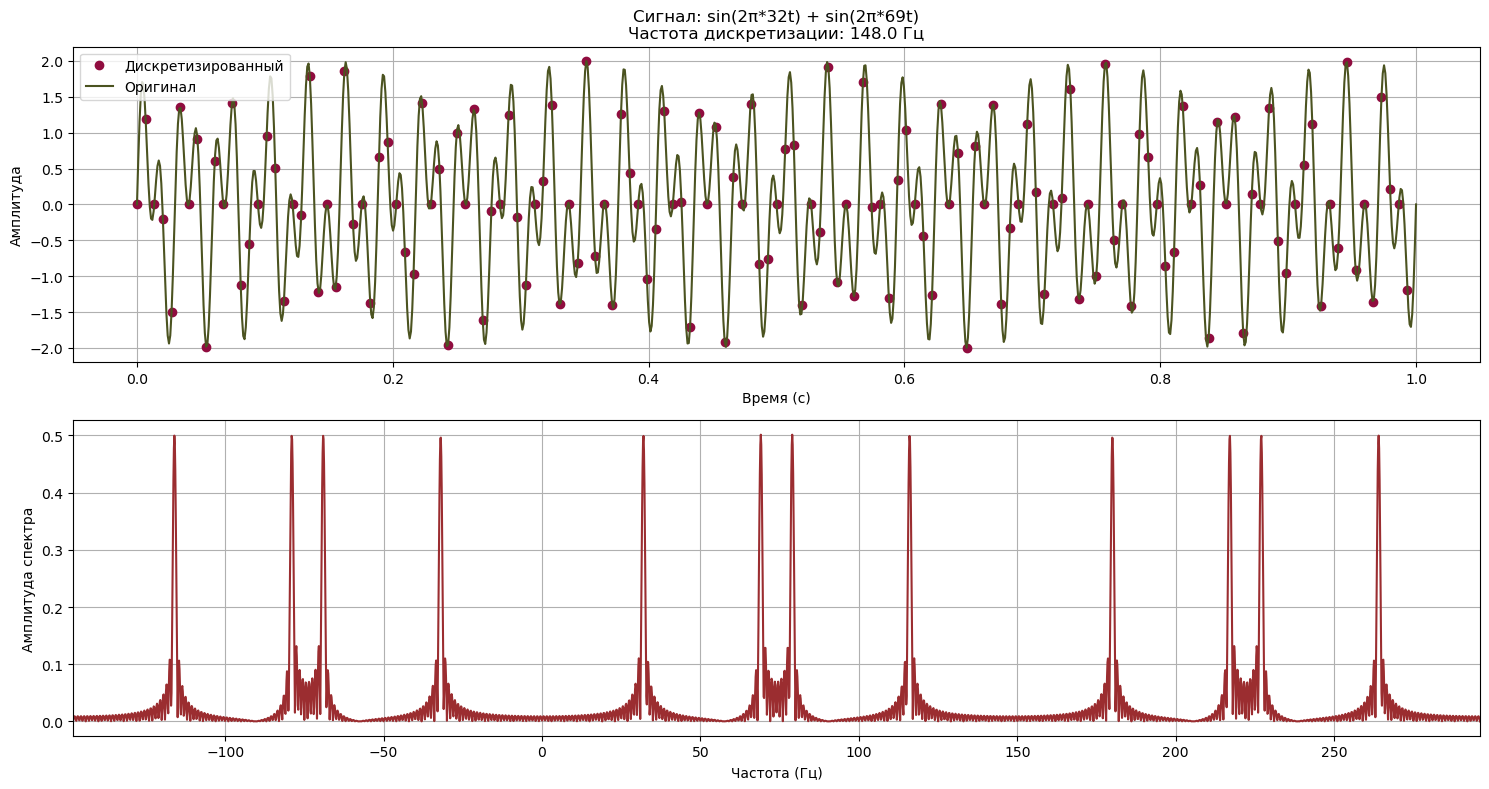

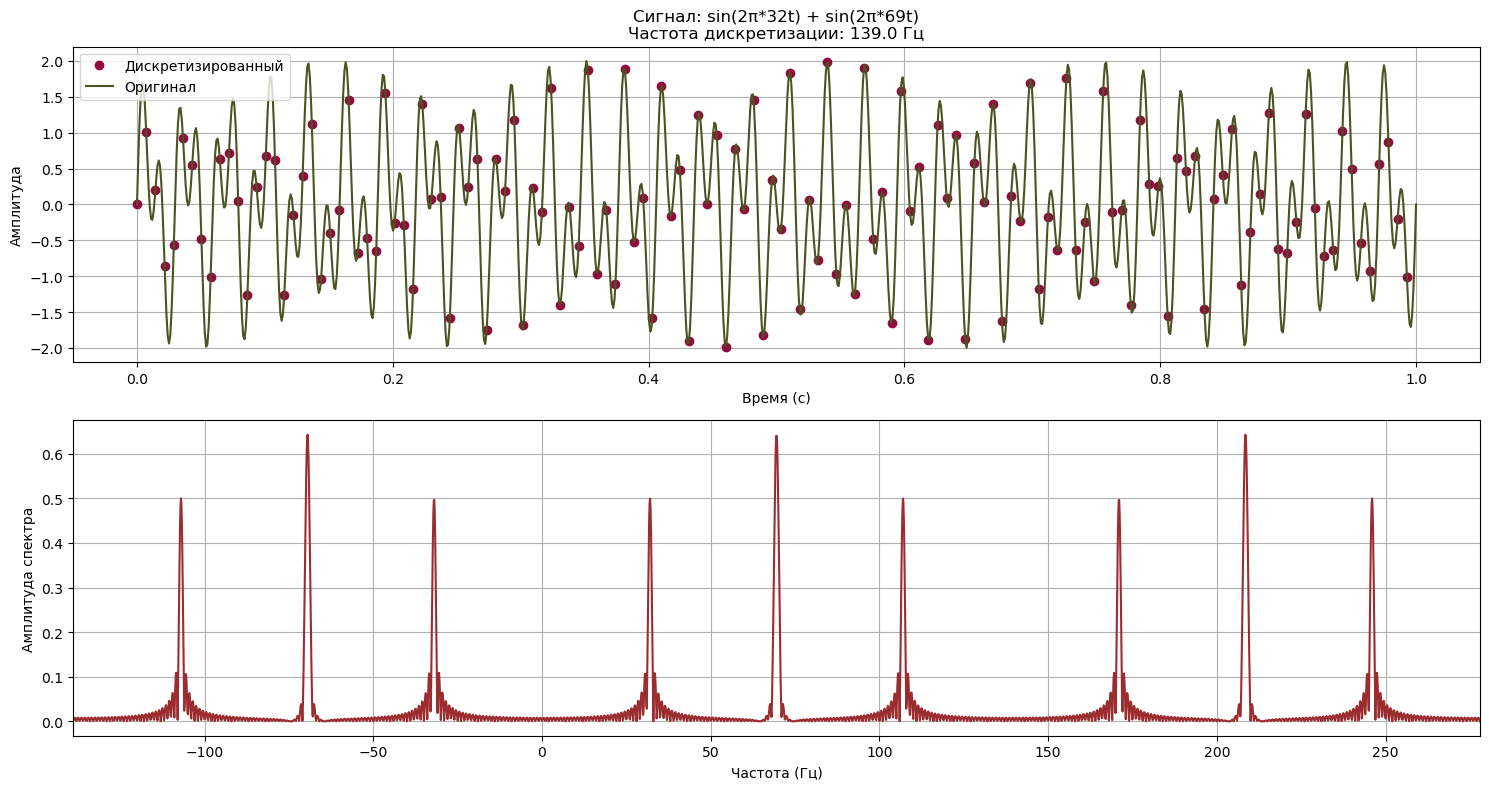

In [68]:
# Задаем параметры сигнала
nu_1, nu_2 = 32, 69  # Частоты сигналов
f_0 = 2 * max(nu_1, nu_2)  # Минимальная частота дискретизации
f_1 = f_0 - 10
f_2 = f_0 + 10
f_3 = f_0 + 1

# Функция для генерации исходного сигнала
def generate_signal(t):
    return np.sin(2 * np.pi * nu_1 * t) + np.sin(2 * np.pi * nu_2 * t)

# def S(sig, delta_t, nu):
#     n = len(sig)
#     signal = np.zeros(len(nu), dtype=complex)

#     for i,Nu in enumerate(nu):
#         mass = 0
#         for k in range(-n,n):
#             mass += sig[k%n] * np.exp(-2j * np.pi * Nu * k * delta_t)
#         signal[i] = mass * delta_t
    
#     return signal

def S(sig, delta_t, nu):
    N = len(sig)
    signal = np.array([np.sum(sig * np.exp(-2j * np.pi * f * np.arange(N) * delta_t) * delta_t) for f in nu])
    return np.abs(signal)
        

for f in [f_1, f_2, f_3]:
    # Генерация дискретизированного сигнала
    time_d = np.arange(0, 1, 1/f)  # Временные точки
    disc_func = generate_signal(time_d)  # Дискретизированный сигнал

    time_orig = np.linspace(0,1,1000)
    func_orig = generate_signal(time_orig)

    fig, axes = plt.subplots(2, 1, figsize=(15, 8))

    axes[0].plot(time_d, disc_func, color='#900C3F', marker='o', linestyle='', label='Дискретизированный', markersize=6)  # Дискретизированный сигнал
    axes[0].plot(time_orig, func_orig, color='#4b5320', linestyle='-', label='Оригинал')  # Оригинальный сигнал
    axes[0].set_xlabel('Время (с)')
    axes[0].set_ylabel('Амплитуда')
    axes[0].grid(True)
    axes[0].set_title(f"Сигнал: sin(2π*{nu_1}t) + sin(2π*{nu_2}t)\nЧастота дискретизации: {f:.1f} Гц")
    axes[0].legend()

    ν = np.linspace(-f,2*f, 3000)  # Частоты для спектра
    Спектр = S(disc_func, 1/f, ν)

    axes[1].plot(ν, Спектр, color='#9B2D30', linestyle='-', label='Дискретизированный', markersize=6)  # Спектр
    axes[1].set_xlim([min(ν), max(ν)])
    axes[1].set_xlabel('Частота (Гц)')
    axes[1].set_ylabel('Амплитуда спектра')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()  # Отображаем графики



$$
\sum_{k=-\infty}^{+\infty} x(k \, \Delta t) \cdot e^{-2 \pi i \nu k \, \Delta t} \cdot \Delta t
$$

## Номер 4

In [30]:
f_d = f_0 - 10  # Возьмем частоту дискретизации меньше чем нужно по критерию

t_k = np.arange(0,1, 0.0001)
x_t = np.sin(2 * np.pi * nu_1 * t_k) + np.sin(2 * np.pi * nu_2 * t_k)

time_d = np.linspace(0, 1, f_d + 1)  # Временные точки
disc_func = generate_signal(time_d)  # Дискретизированный сигнал

def reconstructed(sig, delta_t, t):  # Всем встать в ряд Котельникова
    n = len(sig)
    signal = np.zeros(len(t))

    for i,T in enumerate(t):
        mass = 0
        for k in range(-n,n):
            mass += sig[k%n] * np.sin(np.pi*(1/delta_t)*(T-k*delta_t))/(np.pi*(1/delta_t)*(T-k*delta_t))
        signal[i] = mass
    
    return signal

y_t = reconstructed(disc_func, 1/f_d, t_k)

/tmp/ipykernel_77380/3186989660.py:16: RuntimeWarning: invalid value encountered in scalar divide
  mass += sig[k%n] * np.sin(np.pi*(1/delta_t)*(T-k*delta_t))/(np.pi*(1/delta_t)*(T-k*delta_t))


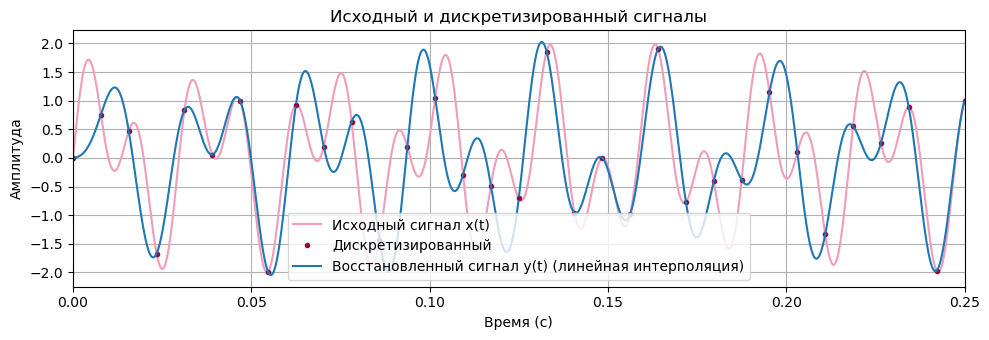

In [67]:
# Графики
plt.figure(figsize=(10, 3.5))
plt.plot(t_k, x_t, color='#f19cbb', label='Исходный сигнал x(t)')
plt.plot(time_d, disc_func, color='#900C3F', marker='o', linestyle='', label='Дискретизированный', markersize=3)
plt.plot(t_k, y_t, label='Восстановленный сигнал y(t) (линейная интерполяция)')
plt.title('Исходный и дискретизированный сигналы')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.xlim(0,0.25)  # Ограничение 0.25 стоит для того чтобы можно было нормально анализировать график
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### ***Итог:*** При неправильно выбранной частоте дискретизации реальный и восстановленный сигнал отличаются, но в точках дискретизации значения совпадают. При такой частоте дискретизации эти сигналы для нас не отличимы

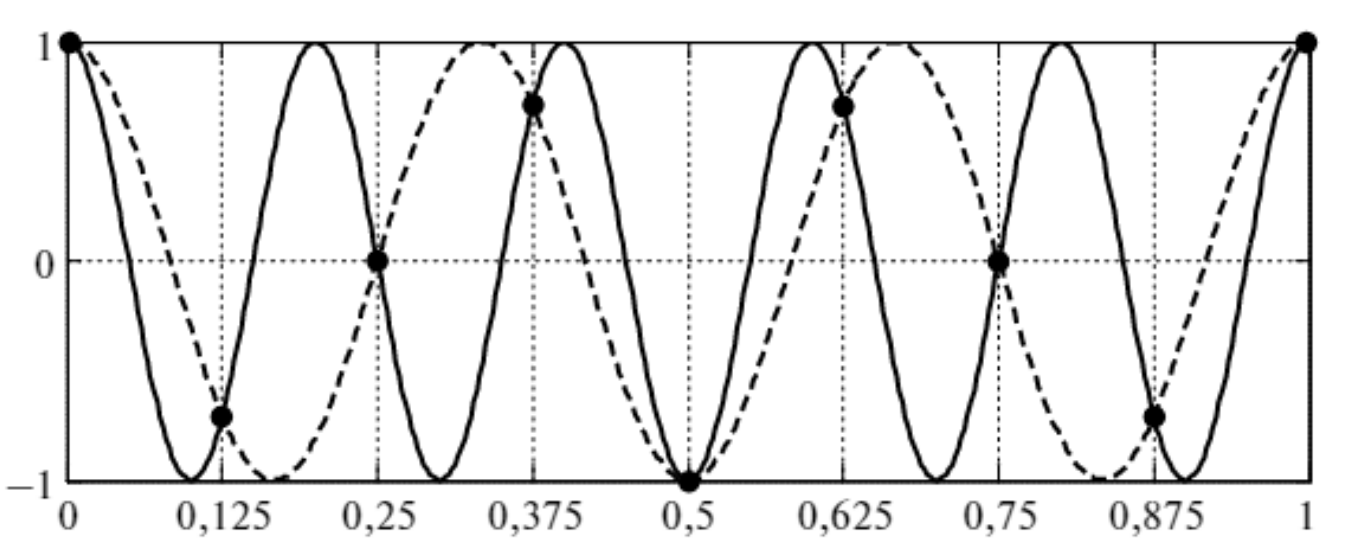

## Номер 5

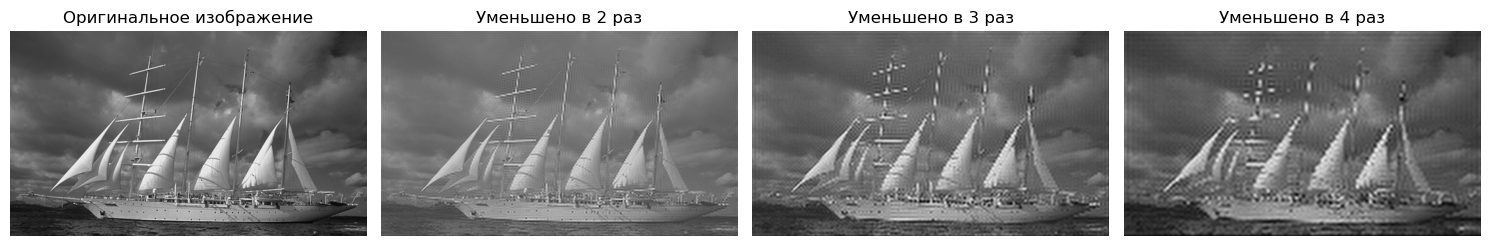

In [32]:
# Считываем изображение
fd = imread('var6.png', as_gray=True)

# Получаем размеры изображения
M, N = fd.shape

# Определяем коэффициенты прореживания
k_values = [2, 3, 4]

# Создаем фигуру для отображения изображений
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(15, 5))

# Отображаем оригинальное изображение
axes[0].imshow(fd, cmap='gray')
axes[0].set_title('Оригинальное изображение')
axes[0].axis('off')

# Проходим по каждому коэффициенту k
for i, k in enumerate(k_values):
    # Прореживаем изображение
    ff = fd[::k, ::k]
    Mk, Nk = ff.shape  # размеры прореженного изображения

    # Создаем массив Sinc для интерполяции
    ColumnInd = np.arange(0, max(Mk, Nk))
    SincArray = np.zeros((max(M, N), max(Mk, Nk)))

    for j in range(max(M, N)):
        SincArray[j] = np.sinc(j / k - ColumnInd)

    # Интерполируем изображение по функции Котельникова
    F = SincArray[:M, :Mk] @ ff @ np.transpose(SincArray[:N, :Nk])

    # Отображаем интерполированное изображение
    axes[i + 1].imshow(F, cmap='gray')
    axes[i + 1].set_title(f'Уменьшено в {k} раз')
    axes[i + 1].axis('off')

# Показываем все изображения
plt.tight_layout()
plt.show()

(-0.5, 556.5, 319.5, -0.5)

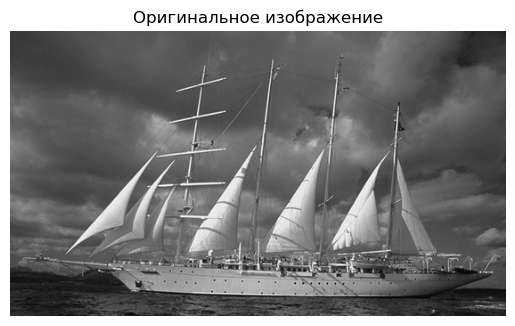

In [58]:
# Отображаем оригинальное изображение
plt.imshow(fd, cmap='gray')
plt.title('Оригинальное изображение')
plt.axis('off')


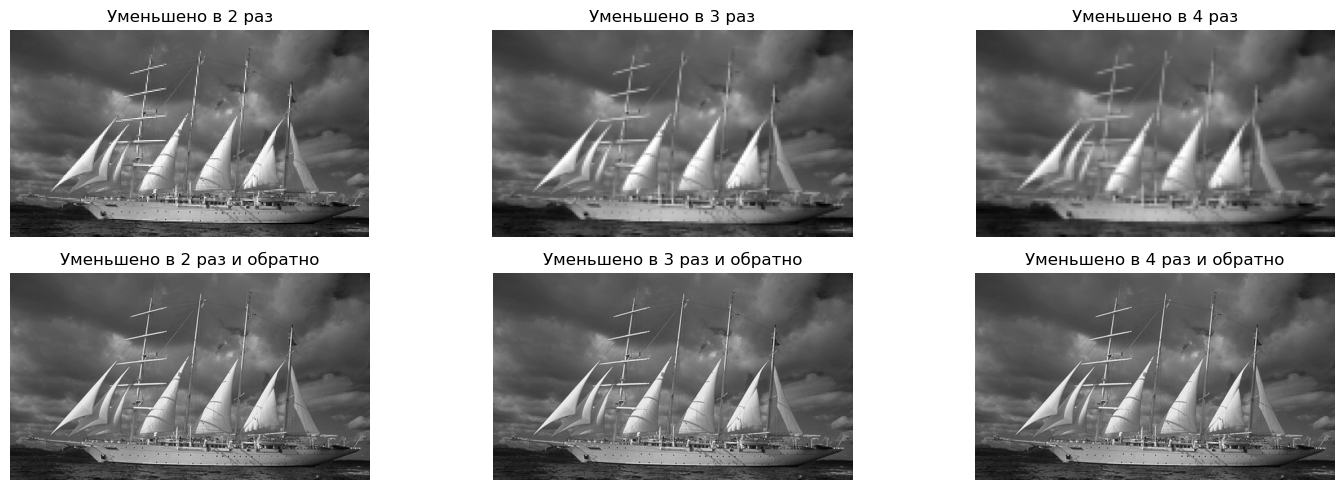

In [56]:
# Создаем фигуру для отображения изображений
fig, axes = plt.subplots(2, len(k_values), figsize=(15, 5))

# Проходим по каждому коэффициенту k
for i, k in enumerate(k_values):
    # Уменьшаем изображение с помощью resize
    resized_image = transform.resize(fd, (M // k, N // k), anti_aliasing=True, order=2)

    # Отображаем уменьшенное изображение
    axes[0][i].imshow(resized_image, cmap='gray')
    axes[0][i].set_title(f'Уменьшено в {k} раз')
    axes[0][i].axis('off')

    resized_image = transform.resize(fd, (M , N), anti_aliasing=True, order=2)

    # Отображаем увеличенное изображение
    axes[1][i].imshow(resized_image, cmap='gray')
    axes[1][i].set_title(f'Уменьшено в {k} раз и обратно')
    axes[1][i].axis('off')



# Показываем все изображения
plt.tight_layout()
plt.show()

# Часть 2

## Номер 1

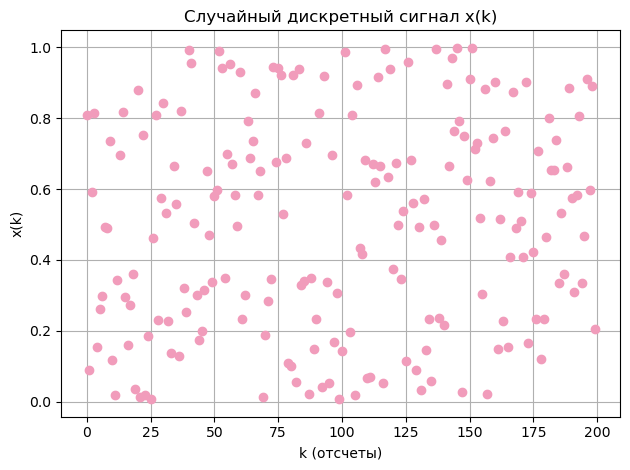

In [65]:
# Устанавливаем параметры
n = 200  # Количество отсчетов
a = 0            # Нижняя граница равномерного распределения
b = 1           # Верхняя граница равномерного распределения

# Генерируем случайный дискретный сигнал
sig = np.random.uniform(a, b, n)

# Создаем оси для графика
k = np.arange(n+1)

old_x = sig.copy()

# Строим график
plt.plot(k[:200],sig,linestyle='', marker='o', color='#f19cbb')
plt.title('Случайный дискретный сигнал x(k)')
plt.xlabel('k (отсчеты)')
plt.ylabel('x(k)')
plt.grid()
plt.tight_layout()
plt.show()

## Номер 2

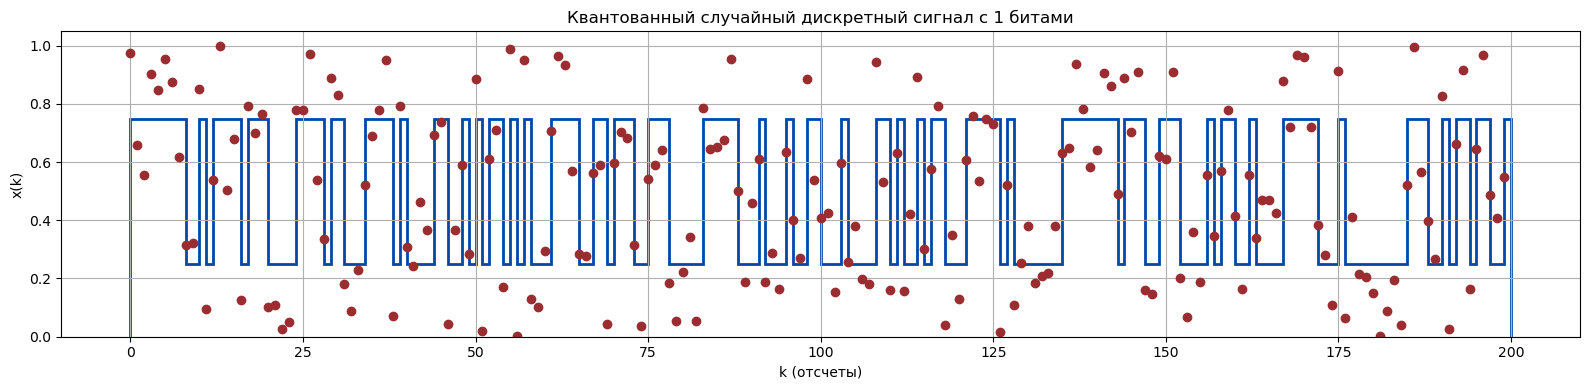

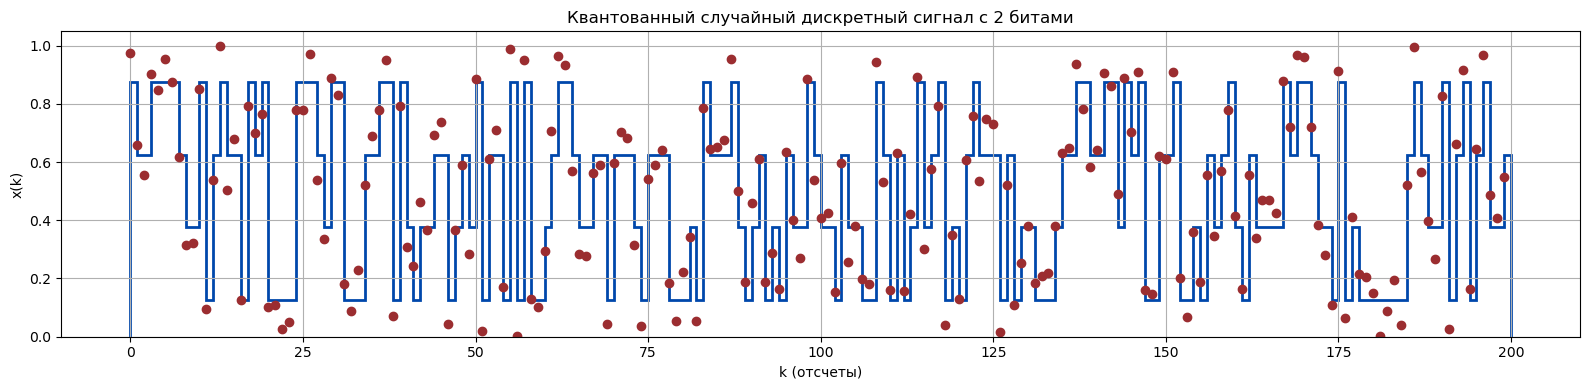

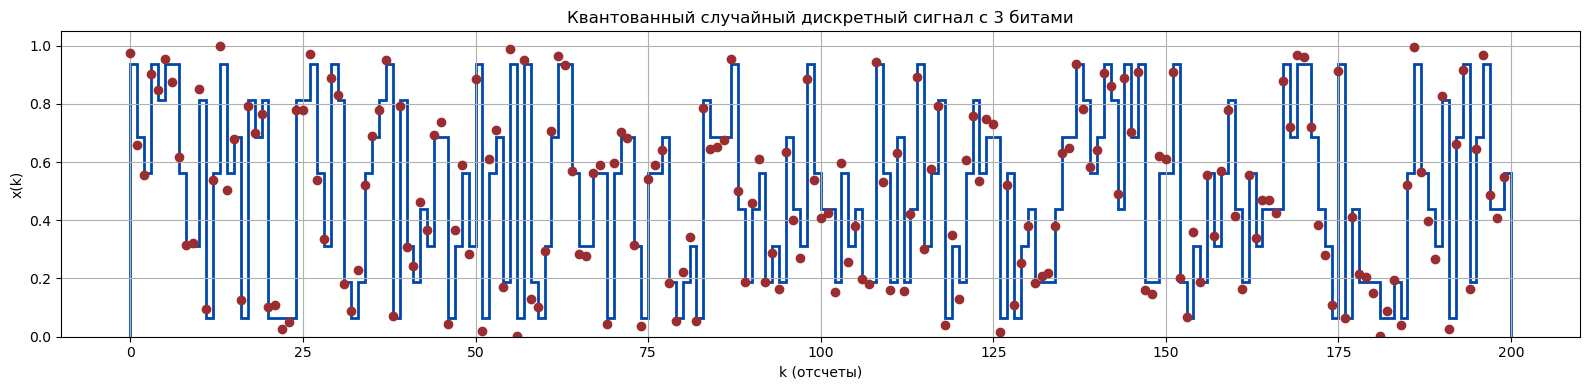

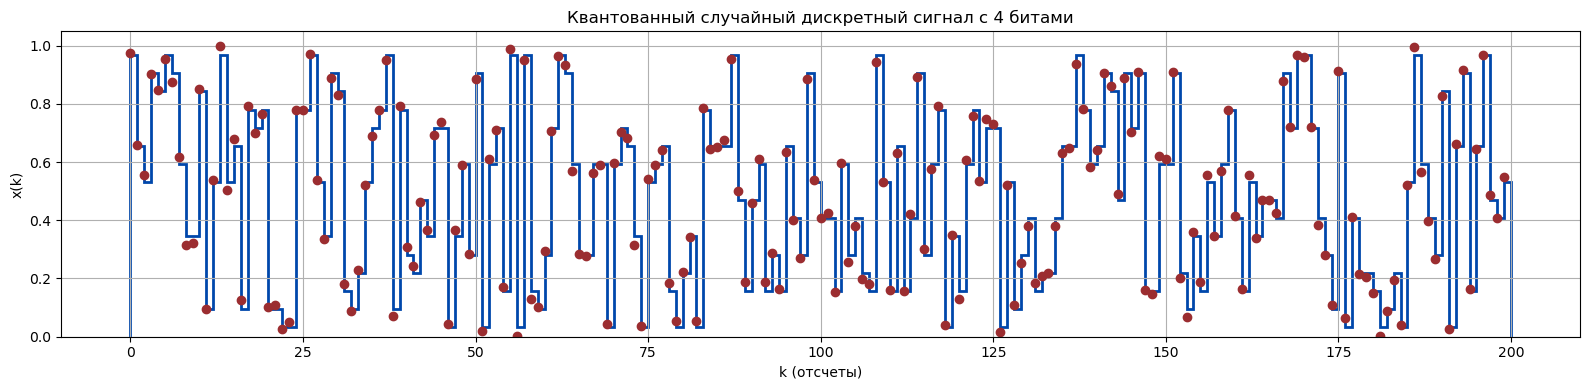

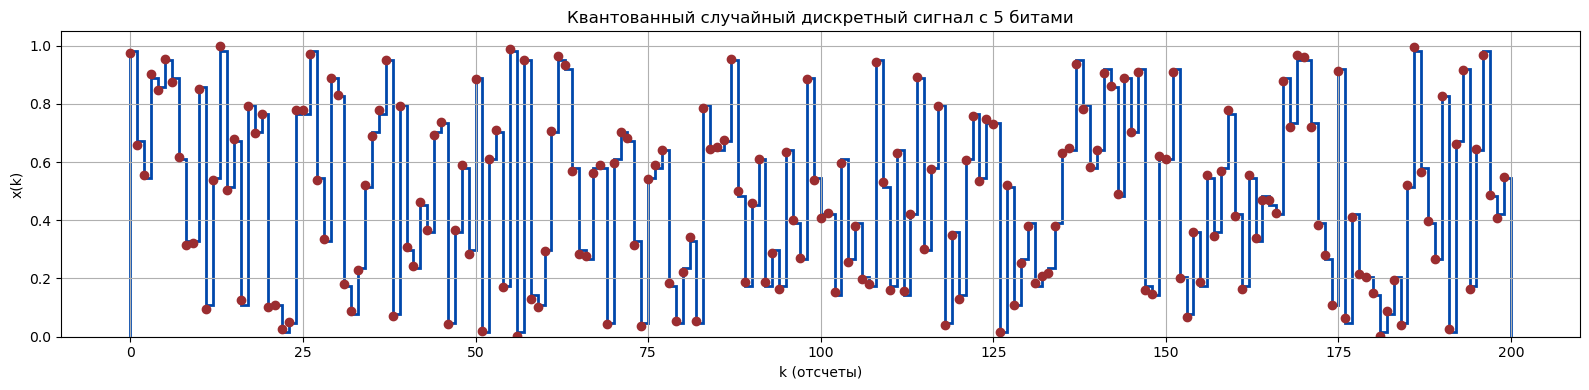

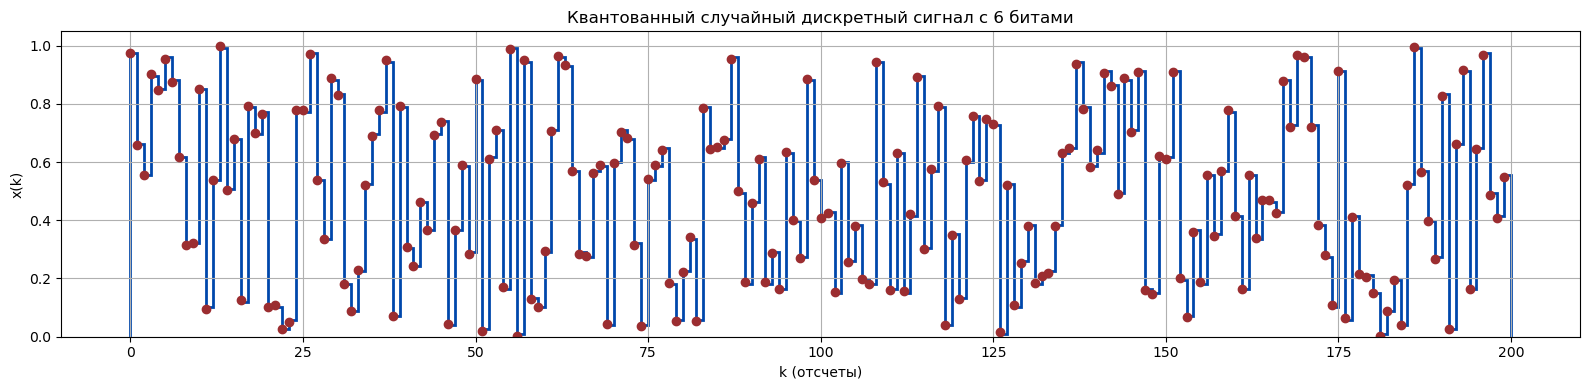

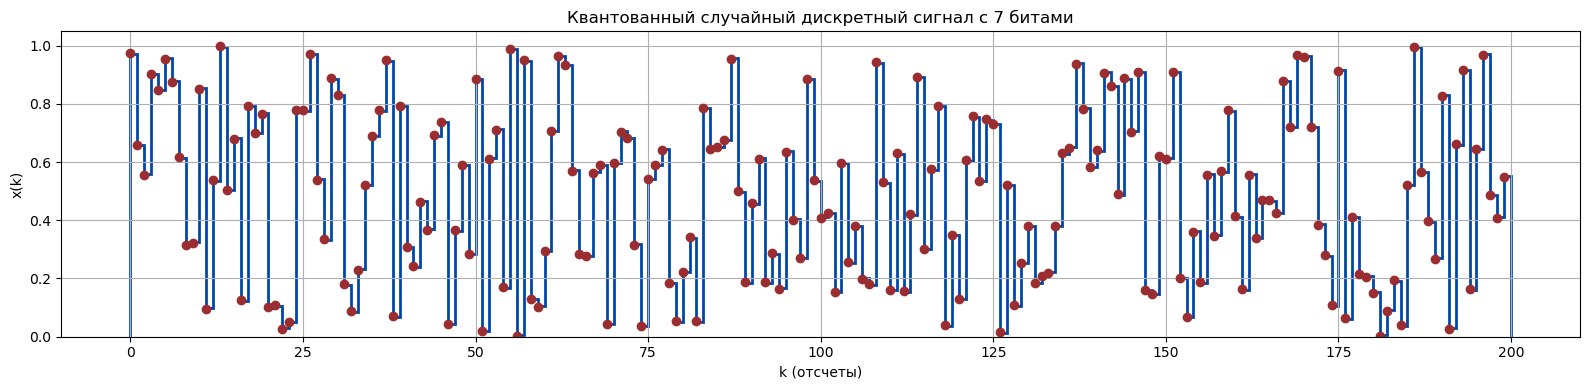

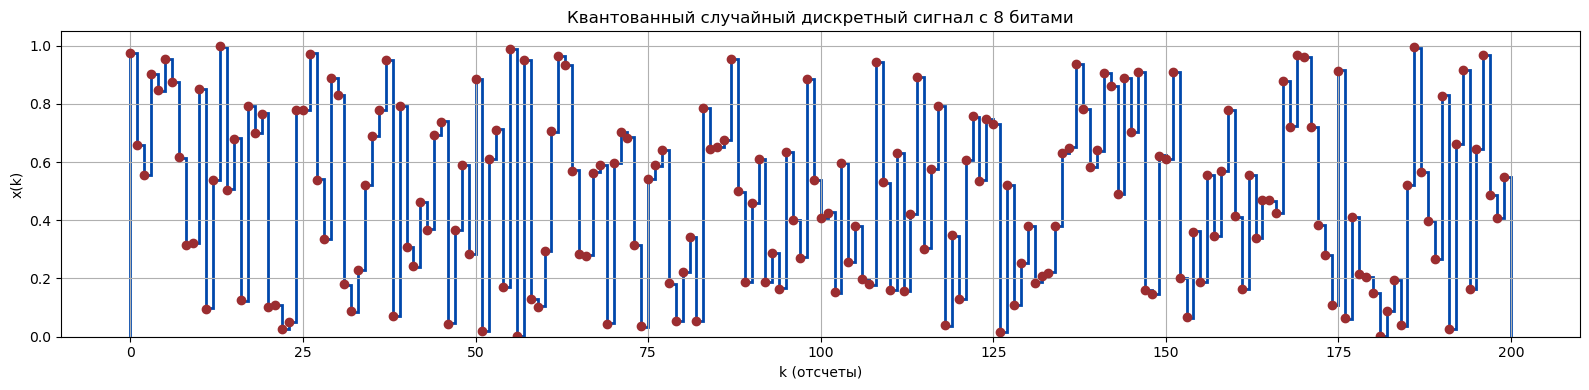

In [44]:
def quantize(signal, bits):
    N_levels = 2 ** bits
    xmin, xmax = min(signal), max(signal)
    q = (xmax - xmin) / N_levels

    d = [xmin + (i + 0.5) * q for i in range(N_levels)]
    J = np.linspace(xmin, xmax, N_levels + 1)
    res = np.zeros(len(signal))
    for i in range(len(signal)):
        for j in range(N_levels):
            if J[j] <= signal[i] <= J[j + 1]:
                res[i] = d[j]
                break

    return res,q

cvant = []
for i in range(1, 9):
    plt.subplots(1, 1, figsize=(16, 4))
    mass, q  = quantize(sig, i)
    cvant.append(mass)
    plt.stairs(mass, k, linestyle='-', color='#0047AB', linewidth=2, label="Квантованный")
    plt.plot(k[:200],sig, linestyle='', marker='o', color='#9B2D30', label="Дискретный сигнал")
    plt.title(f'Квантованный случайный дискретный сигнал с {i} битами')
    plt.xlabel('k (отсчеты)')
    plt.ylabel('x(k)')
    plt.grid()
    plt.tight_layout()
    plt.show()
    # 0047AB
    # 9B2D30


## Номер 3

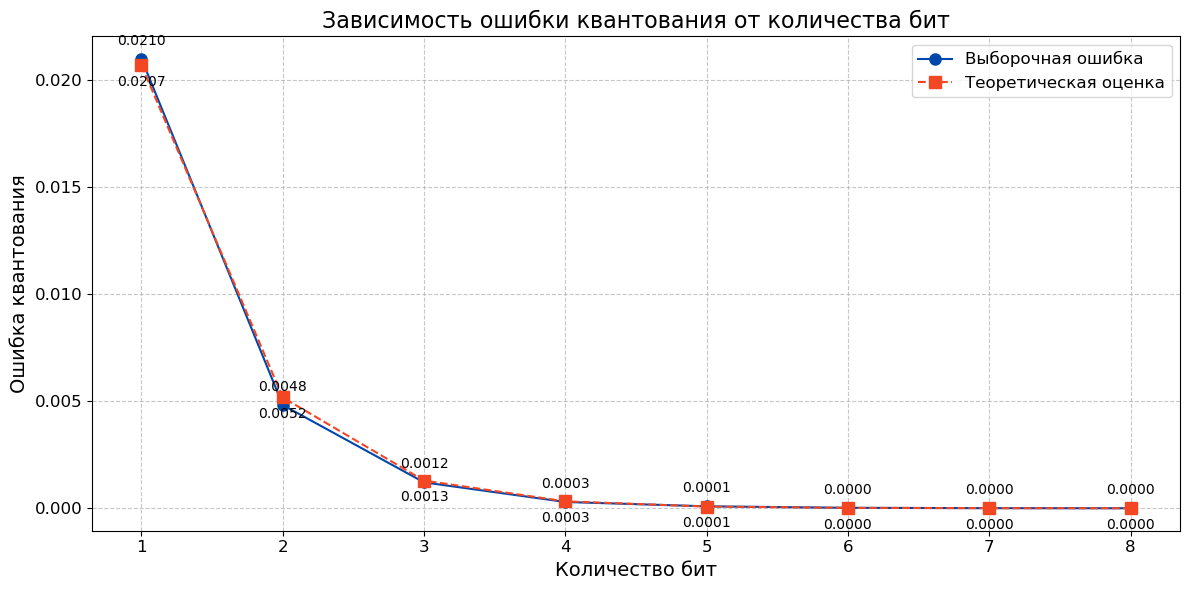

In [36]:
emp_errors = []
theor_errors = []

for bit in range(1, 9):
    x_quant, q = quantize(sig, bit)

    emp_error = np.mean((sig - x_quant) ** 2)
    emp_errors.append(emp_error)

    theor_error = q**2 / 12
    theor_errors.append(theor_error)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 9), emp_errors, marker='o', linestyle='-', color='#0047AB', markersize=8, label="Выборочная ошибка")
plt.plot(range(1, 9), theor_errors, marker='s', linestyle='--', color='#f34723', markersize=8, label="Теоретическая оценка")

plt.xlabel("Количество бит", fontsize=14)
plt.ylabel("Ошибка квантования", fontsize=14)
plt.title("Зависимость ошибки квантования от количества бит", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Добавление аннотаций для каждой точки
for i in range(len(emp_errors)):
    plt.annotate(f"{emp_errors[i]:.4f}", (i + 1, emp_errors[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f"{theor_errors[i]:.4f}", (i + 1, theor_errors[i]), textcoords="offset points", xytext=(0,-15), ha='center')

plt.tight_layout()
plt.show()

## Номер 4

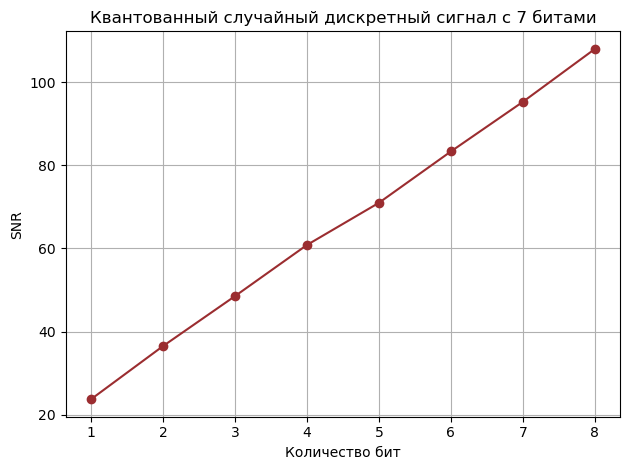

In [ ]:
snr_values = []

A_signal = np.mean(sig ** 2)

for bit in range(1,9):
    x_quant,q = quantize(sig, bit)

    # Выборочная ошибка квантования (формула 5)
    A_noise = np.mean((sig - x_quant) ** 2)
    emp_errors.append(A_noise)

    # Вычисление SNR
    SNR = 10 * np.log10(A_signal / A_noise)
    snr_values.append(SNR)

plt.plot(range(1,9), snr_values, marker='o', linestyle='-', color='#9B2D30', label="Дискретный сигнал")
plt.title(f'Квантованный случайный дискретный сигнал с {i} битами')
plt.xlabel('Количество бит')
plt.ylabel('SNR')
plt.grid()
plt.tight_layout()
plt.show()

## Номер 5

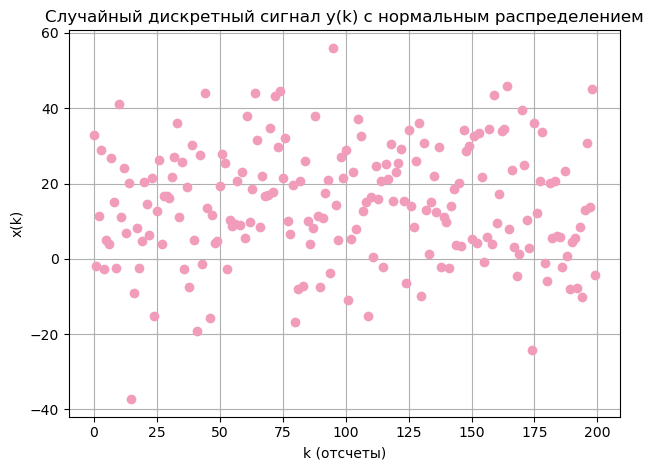

In [66]:
m = 15
σ = m + 1

y = np.random.normal(m, σ, n)

# Создаем оси для графика
k = np.arange(n+1)

old_x = sig.copy()

# Строим график
plt.plot(k[:200],y, linestyle='', marker='o', color='#f19cbb')
plt.title('Случайный дискретный сигнал y(k) с нормальным распределением')
plt.xlabel('k (отсчеты)')
plt.ylabel('x(k)')
plt.grid()
plt.tight_layout()
plt.show()

## Номер 6 и 7

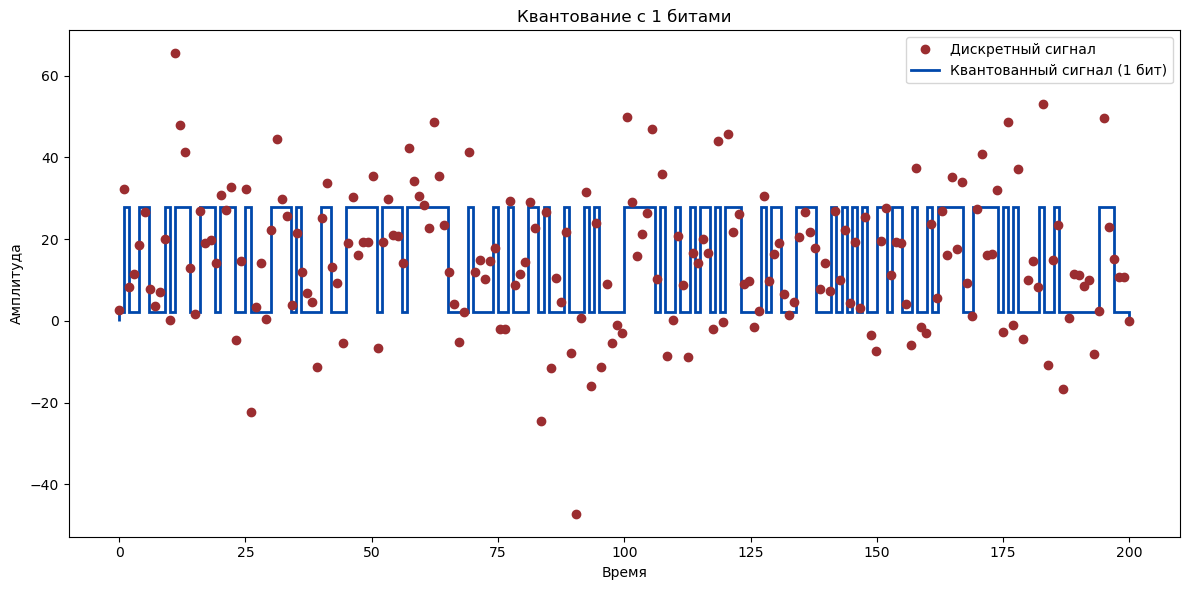

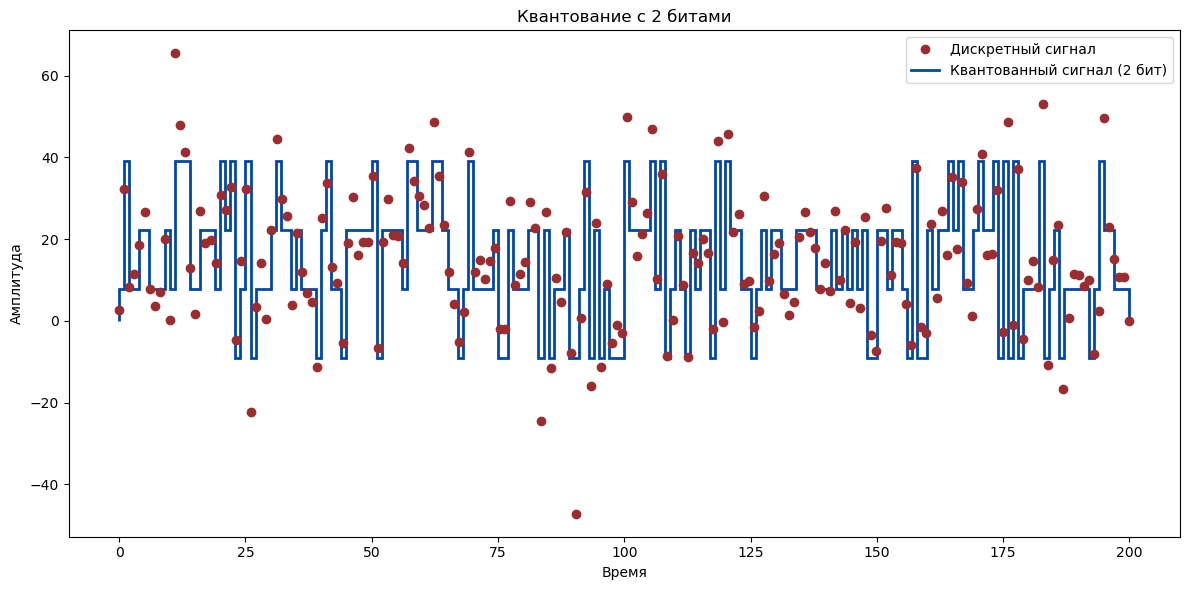

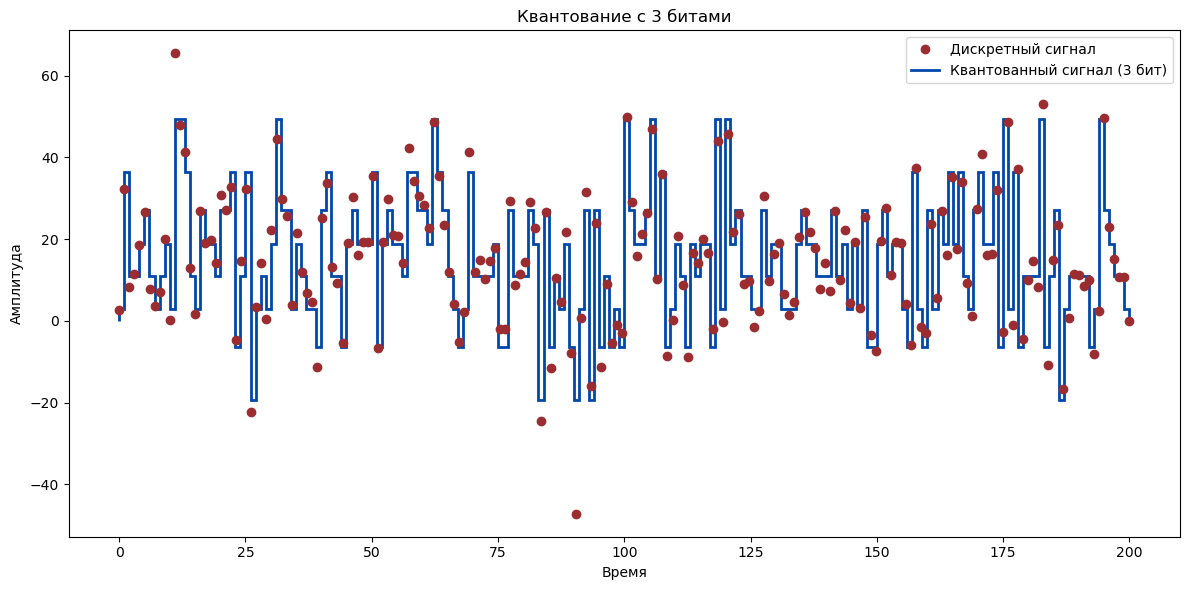

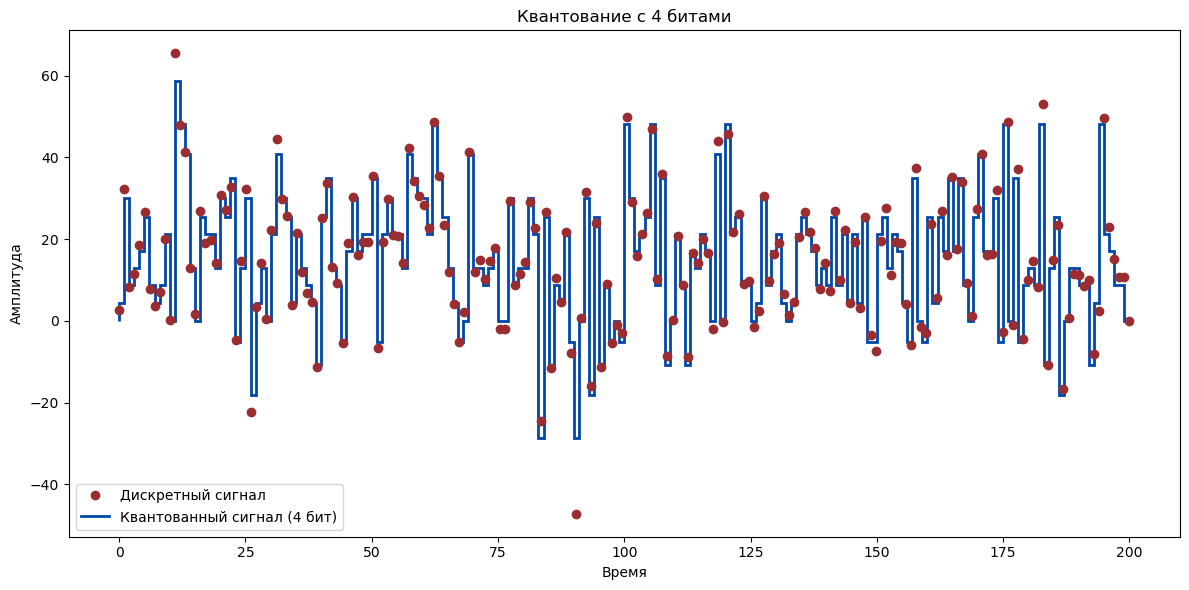

In [39]:
def lloyd_max_quantizer(x, bit, m, σ):
    # Определение уровней квантования и порогов для различных битовых глубин
    quant_levels = {
        1: ([-np.inf, 0, np.inf], [-0.7979, 0.7979]),

        2: ([-np.inf, -0.9816, 0, 0.9816, np.inf], [-1.5104, -0.4528, 0.4528, 1.5104]),

        3: ([-np.inf, -1.7479, -1.0500, -0.5005, 0, 0.5005, 1.0500, 1.7479, np.inf],
            
            [-2.1519, -1.3439, -0.7560, -0.2451, 0.2451, 0.7560, 1.3439, 2.1519]),

        4: ([-np.inf, -2.4008, -1.8435, -1.4371, -1.0993, -0.7995, -0.5224, -0.2582, 0,
              0.2582, 0.5224, 0.7995, 1.0993, 1.4371, 1.8435, 2.4008, np.inf],
            [-2.7326, -2.0690, -1.6180, -1.2562, -0.9423, -0.6568, -0.3880, -0.1284,
              0.1284, 0.3880, 0.6568, 0.9423, 1.2562, 1.6180, 2.0690, 2.7326])
    }

    # Извлечение порогов и уровней квантования для заданной битовой глубины
    thresholds = np.array(quant_levels[bit][0]) * σ + m
    quantization_levels = np.array(quant_levels[bit][1]) * σ + m

    # Инициализация выходного массива
    x_quant = np.zeros_like(x)

    # Применение квантования
    for i in range(len(quantization_levels)):
        if i < len(thresholds) - 1:
            mask = (x >= thresholds[i]) & (x < thresholds[i + 1])
            x_quant[mask] = quantization_levels[i]

    return x_quant

bit_depths = [1, 2, 3, 4]
t = np.linspace(0, len(y), len(y))

for i in bit_depths:
    y_quant = lloyd_max_quantizer(y, i, m, σ)
    
    plt.figure(figsize=(12, 6))
    
    # Используем plot для начального сигнала
    plt.plot(t[:200], y[:200], linestyle='', marker='o', color='#9B2D30', label="Дискретный сигнал")
    
    # Используем stairs для квантованного сигнала
    plt.stairs(y_quant[:200], np.arange(len(y_quant) + 1)[:201], linestyle='-', color='#0047AB', linewidth=2, label=f"Квантованный сигнал ({i} бит)")
    
    plt.legend()
    plt.title(f"Квантование с {i} битами")
    plt.xlabel("Время")
    plt.ylabel("Амплитуда")
    
    plt.tight_layout()
    plt.show()

## Номер 8

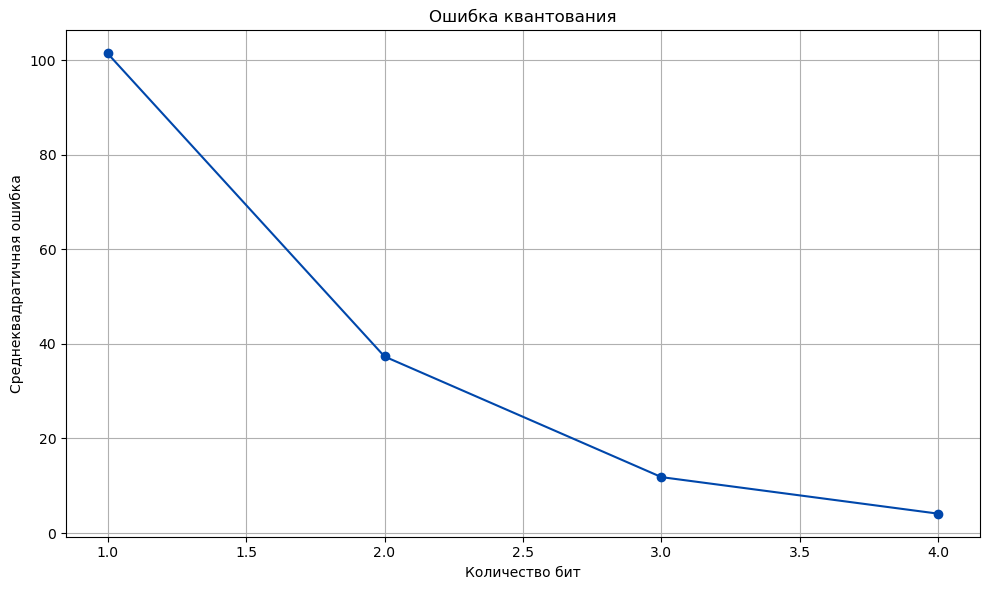

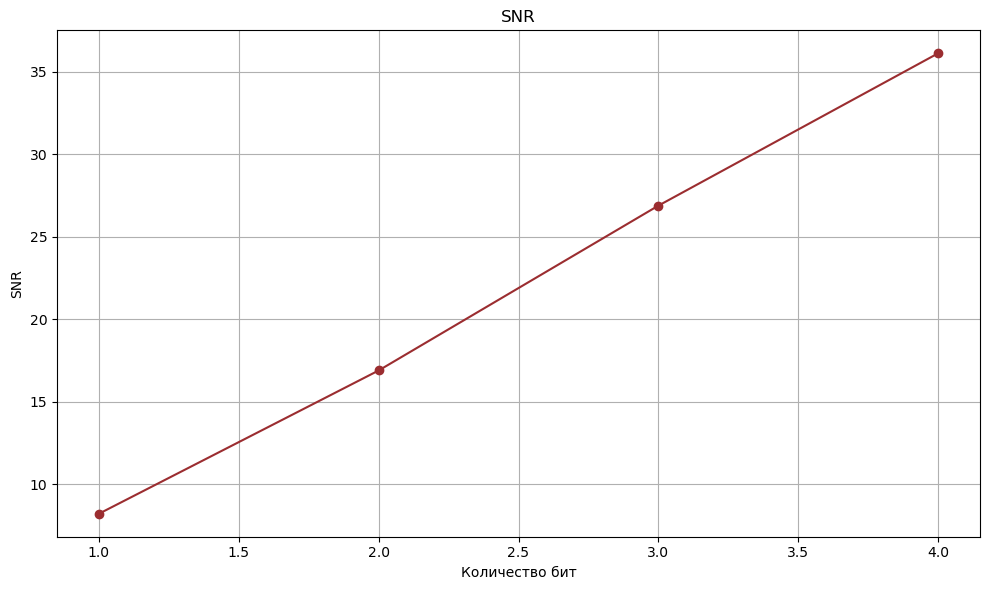

In [ ]:

def ERr_Snr(y, y_q):
    err_quant = np.mean((y - y_q) ** 2)
    SNR = 10 * np.log10(np.var(y) / err_quant)
    return err_quant, SNR

err_quant = []
SNR = []

for i in bit_depths:
    y_q = lloyd_max_quantizer(y, i, m, σ)
    value = ERr_Snr(y, y_q)
    err_quant.append(value[0])
    SNR.append(value[1])

# График 1: Ошибка квантования
plt.figure(figsize=(10, 6))
plt.plot(bit_depths, err_quant, marker='o', linestyle='-', color='#0047AB')
plt.xlabel("Количество бит")
plt.ylabel("Среднеквадратичная ошибка")
plt.title("Ошибка квантования")
plt.grid()
plt.tight_layout()
plt.show()

# График 2: Отношение сигнал/шум (SNR)
plt.figure(figsize=(10, 6))
plt.plot(bit_depths, SNR, marker='o', linestyle='-', color='#9B2D30')
plt.xlabel("Количество бит")
plt.ylabel("SNR")
plt.title("SNR")
plt.grid()
plt.tight_layout()
plt.show()

## Номер 9

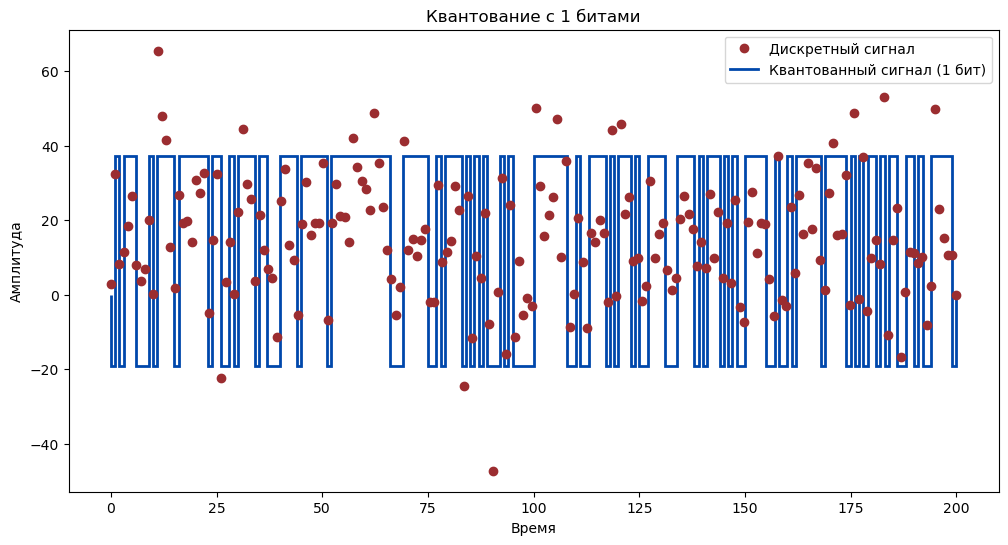

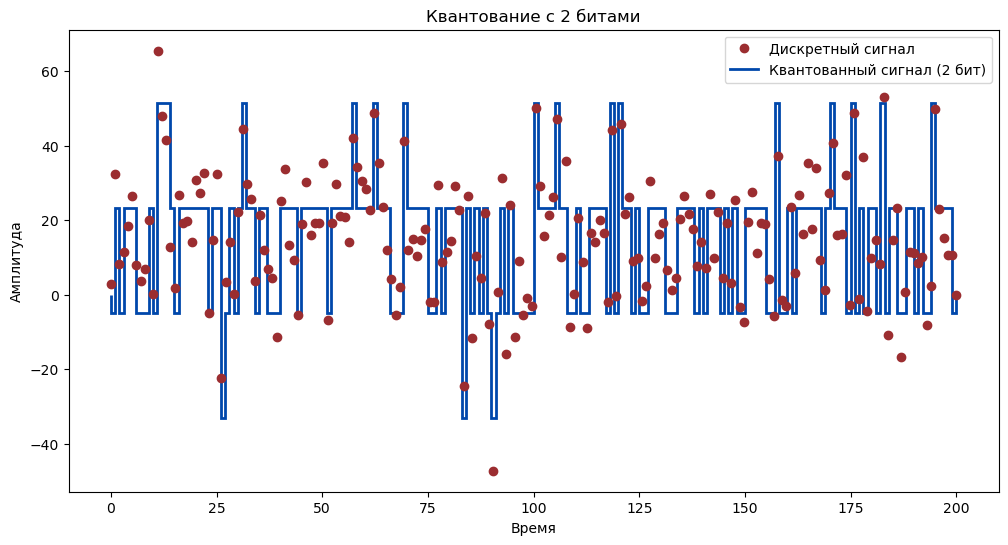

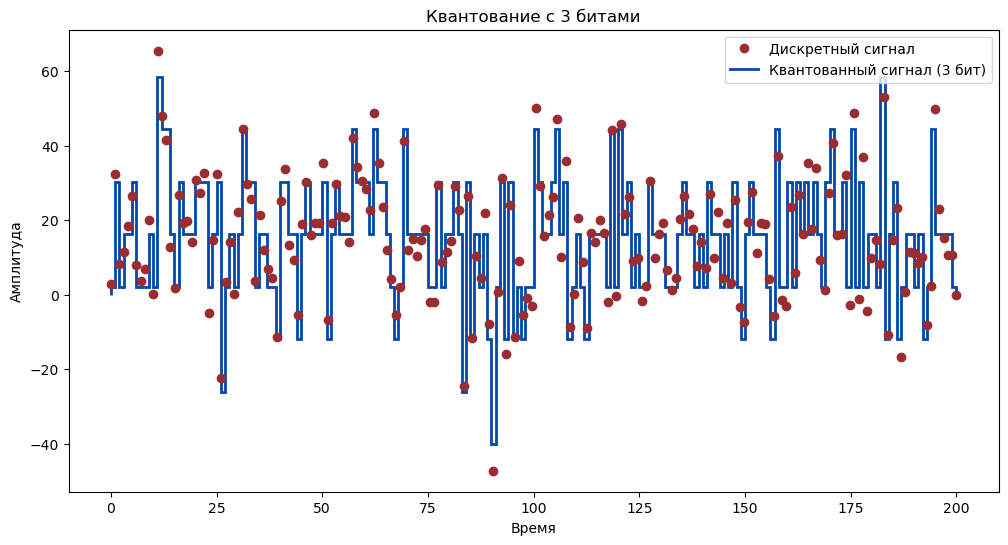

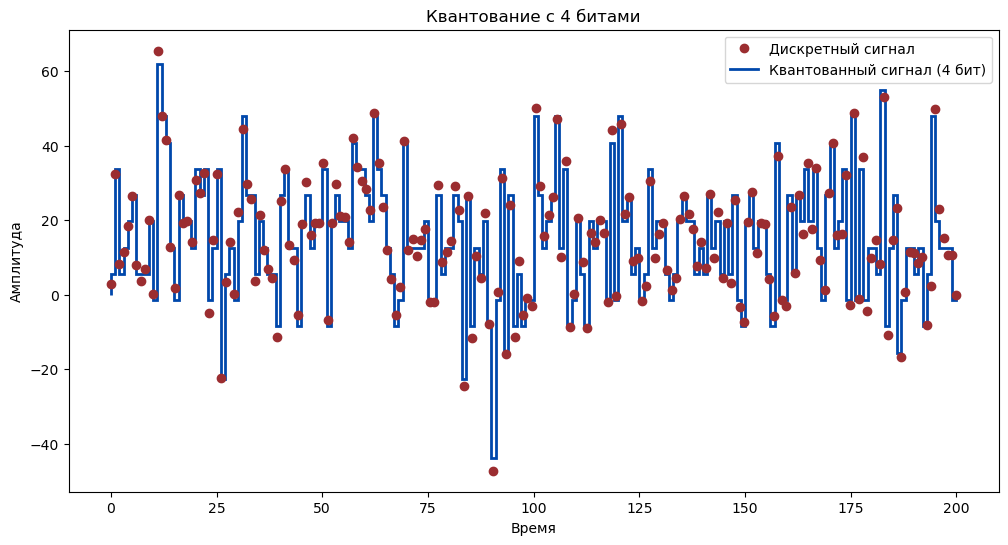

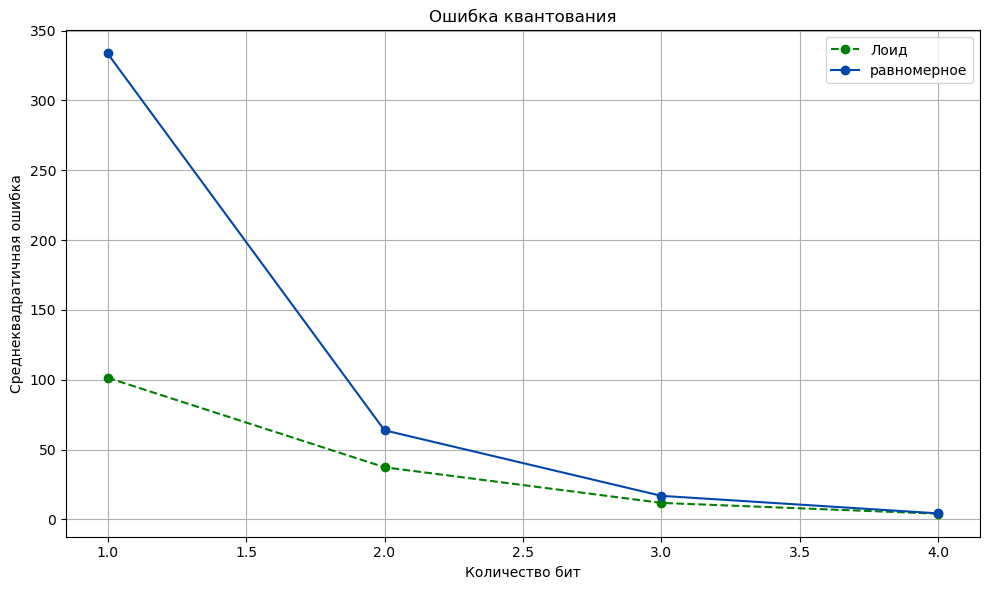

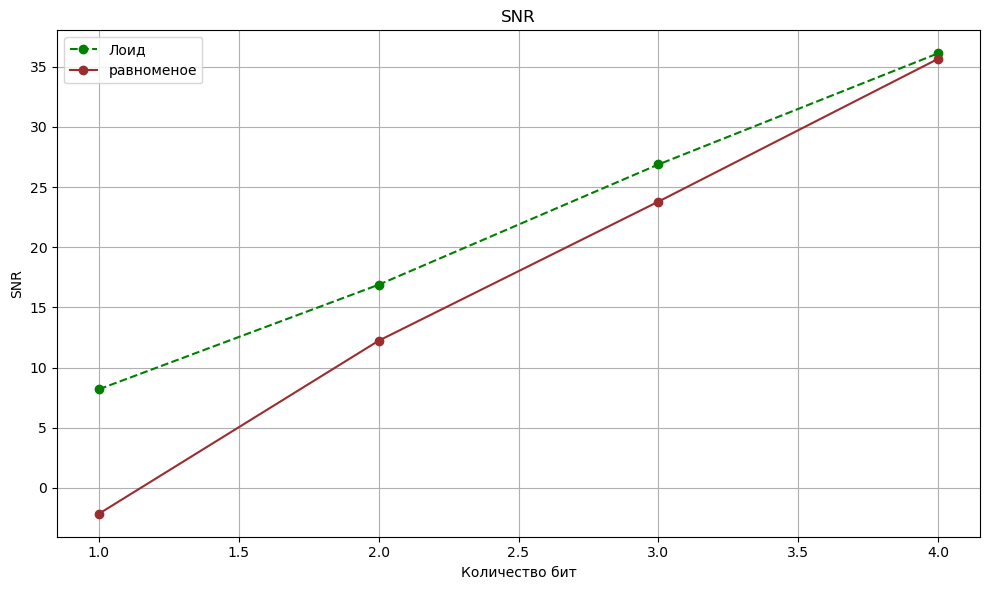

In [41]:
bit_depths = [1, 2, 3, 4]
t = np.linspace(0, len(y), len(y))

for i in bit_depths:
    y_quant, q = quantize(y, i)
    
    plt.figure(figsize=(12, 6))
    
    # Используем plot для начального сигнала
    plt.plot(t[:200], y[:200], linestyle='', marker='o', color='#9B2D30', label="Дискретный сигнал")
    
    # Используем stairs для квантованного сигнала
    plt.stairs(y_quant[:200], np.arange(len(y_quant) + 1)[:201], linestyle='-', color='#0047AB', linewidth=2, label=f"Квантованный сигнал ({i} бит)")
    
    plt.legend()
    plt.title(f"Квантование с {i} битами")
    plt.xlabel("Время")
    plt.ylabel("Амплитуда")

err_quant_u = []
SNR_u = []

for i in bit_depths:
    y_q_u = quantize(y, i)[0]
    value = ERr_Snr(y, y_q_u)
    err_quant_u.append(value[0])
    SNR_u.append(value[1])

# График 1: Ошибка квантования
plt.figure(figsize=(10, 6))
plt.plot(bit_depths, err_quant, marker='o', linestyle='--', label="Лоид", color='green')
plt.plot(bit_depths, err_quant_u, marker='o', linestyle='-', color='#0047AB', label="равномерное")
plt.xlabel("Количество бит")
plt.ylabel("Среднеквадратичная ошибка")
plt.title("Ошибка квантования")
plt.grid()
plt.legend()  # Добавляем легенду
plt.tight_layout()
plt.show()

# График 2: Отношение сигнал/шум (SNR)
plt.figure(figsize=(10, 6))
plt.plot(bit_depths, SNR, marker='o', linestyle='--', label="Лоид", color='green')
plt.plot(bit_depths, SNR_u, marker='o', linestyle='-', color='#9B2D30', label="равноменое")
plt.xlabel("Количество бит")
plt.ylabel("SNR")
plt.title("SNR")
plt.grid()
plt.legend()  # Добавляем легенду
plt.tight_layout()
plt.show()